In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("records.csv")
df.head()

,Start Time,Request Type,Latency,Response Code
0,1675668563465,POST,720,201
1,1675668563464,POST,722,201
2,1675668563464,POST,722,201
3,1675668563464,POST,723,201
4,1675668563465,POST,722,201


In [3]:
df_sorted = df.sort_values(by="Start Time")
df_sorted["Start Time"] -= df_sorted["Start Time"].min()
print(df_sorted["Start Time"].max())
df_sorted["Start Time"] //= 1000
df_sorted.head()

87070


,Start Time,Request Type,Latency,Response Code
134,0,POST,779,201
285,0,POST,837,201
22,0,POST,731,201
69,0,POST,746,201
126,0,POST,771,201


In [4]:
bins = np.arange(df_sorted["Start Time"].min(), df_sorted["Start Time"].max() + 2)

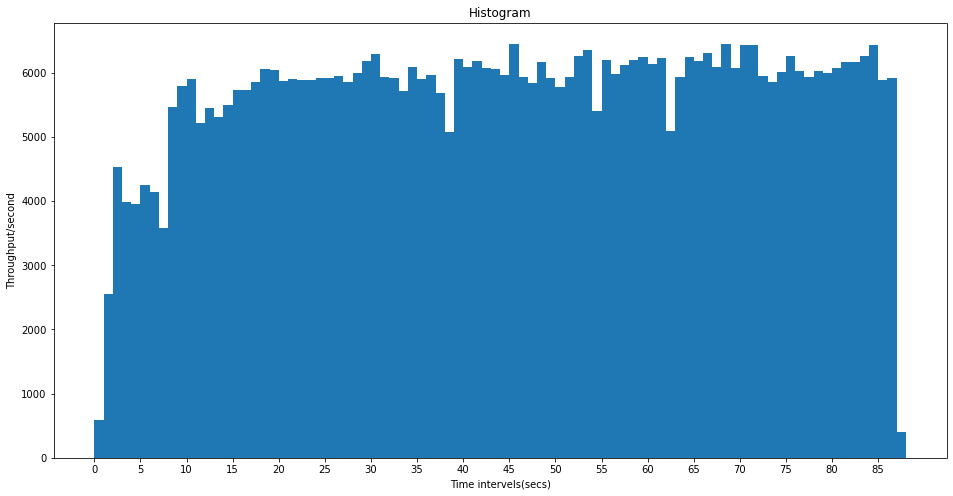

In [5]:
plt.subplots(figsize=(16, 8))
plt.hist(df_sorted["Start Time"], bins)
plt.xticks(np.arange(df_sorted["Start Time"].min(), df_sorted["Start Time"].max() + 2, 5))
plt.xlabel("Time intervels(secs)")
plt.ylabel("Throughput/second")
plt.title("Histogram")
plt.savefig("performance.png")
plt.show()